In [111]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import seaborn as sns 
import matplotlib.pyplot as plt 
import seaborn as sns 

# 
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Data preparation 

In [62]:
Fashion_Mnist = tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = Fashion_Mnist.load_data()

In [63]:
X_train.shape

(60000, 28, 28)

In [64]:
X_train = np.expand_dims(X_train,axis = 3)
X_train.shape

(60000, 28, 28, 1)

In [65]:
X_train.ndim

4

In [66]:
y_train.shape

(60000,)

In [67]:
X_test.shape

(10000, 28, 28)

# Displaying images 

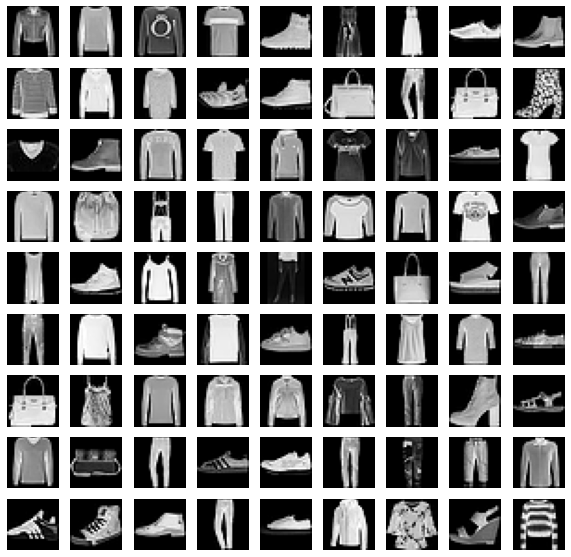

In [68]:
fig = plt.figure(figsize = (10,10))
indices = list(np.random.randint(60000,size = 81))
rows = 9 
columns = 9 
for i in range(1,rows*columns + 1): 
  im = X_train[indices[i-1]].reshape(28,28)
  fig.add_subplot(rows,columns,i)
  plt.axis('off')
  plt.imshow(im,cmap = 'gray',vmin = 0,vmax = 255)

# Data normalization 

In [69]:
X_train = X_train/255.0
X_test  = X_test/255.0 

In [70]:
X_train.shape

(60000, 28, 28, 1)

In [71]:
X_test = np.expand_dims(X_test,axis = 3)
X_test.shape

(10000, 28, 28, 1)

In [72]:
y_train.shape

(60000,)

# Build Model

In [99]:
class LetNet_Model(tf.keras.Model) :
  def __init__(self,input_shape = (28,28,1)) :
    super(LetNet_Model,self).__init__() 
    # define model architechure
    #self.Sequential = tf.keras.Sequential()
    # define input shape
    self.Input_layer = tf.keras.layers.Input(input_shape)
    # Convolution 1 and max pooling 1 
    self.Conv2D1 = Conv2D(filters = 6,kernel_size = (5,5),padding = 'same',activation = 'relu')
    self.MaxPool = MaxPool2D(pool_size = (2,2))
    # defien the next convolutio2 and max pooling 2 
    self.Conv2D2 = Conv2D(filters = 16,kernel_size = (5,5))
    # flatten 
    self.Flatten = Flatten()
    # fully conencted layers 
    self.Dense1 = Dense(120,activation = 'relu')
    self.Dropout = Dropout(0.5)
    self.Dense2 = Dense(84,activation = 'relu')
    self.Dropout1 = Dropout(0.2)
    self.Dense3 = Dense(10,activation = 'softmax')
    self.out = self.call(self.Input_layer)    
    #self.out = self.call(self.Input_layer)
  def call(self,inputs) :
    inputs = self.Conv2D1(inputs)
    inputs = self.MaxPool(inputs)
    inputs = self.Conv2D2(inputs)
    inputs = self.Flatten(inputs)
    inputs = self.Dense1(inputs)
    inputs = self.Dropout(inputs)
    inputs = self.Dense2(inputs)
    inputs = self.Dropout1(inputs)
    return self.Dense3(inputs) 
#def main() : 
model = LetNet_Model()

if __name__ == "__main__" : 
  main()

In [100]:
model.layers

In [103]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

history = model.fit(X_train,y_train,
                    validation_data = (X_test,y_test), 
                    epochs = 200,
                    verbose = 1,
                    shuffle = True,
                    batch_size = 1024)

Epoch 1/200
59/59 [==============================] - 1s 12ms/step - loss: 0.5464 - accuracy: 0.8032 - val_loss: 0.4248 - val_accuracy: 0.8438
Epoch 2/200
59/59 [==============================] - 0s 8ms/step - loss: 0.4660 - accuracy: 0.8342 - val_loss: 0.3836 - val_accuracy: 0.8597
Epoch 3/200
59/59 [==============================] - 0s 8ms/step - loss: 0.4187 - accuracy: 0.8504 - val_loss: 0.3622 - val_accuracy: 0.8681
Epoch 4/200
59/59 [==============================] - 0s 8ms/step - loss: 0.4053 - accuracy: 0.8568 - val_loss: 0.3483 - val_accuracy: 0.8732
Epoch 5/200
59/59 [==============================] - 0s 8ms/step - loss: 0.3752 - accuracy: 0.8678 - val_loss: 0.3374 - val_accuracy: 0.8759
Epoch 6/200
59/59 [==============================] - 0s 8ms/step - loss: 0.3567 - accuracy: 0.8725 - val_loss: 0.3255 - val_accuracy: 0.8827
Epoch 7/200
59/59 [==============================] - 0s 8ms/step - loss: 0.3452 - accuracy: 0.8758 - val_loss: 0.3170 - val_accuracy: 0.8868
Epoch 8/200


In [115]:
model.summary()

Model: "let_net__model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
flatten_18 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 120)               192120    
_________________________________________________________________
dropout_8 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 84)          

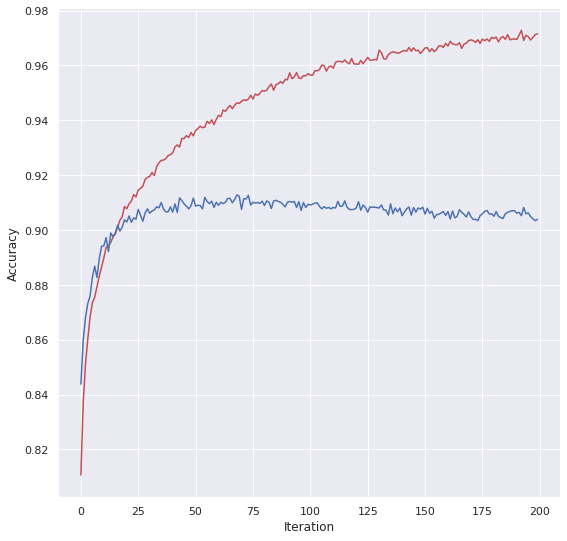

In [112]:
fig = plt.figure(figsize = (9,9))
sns.set_theme(color_codes = True)
plt.plot(history.history['accuracy'], label = 'accuracy',color = 'r')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy',color = 'b')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()

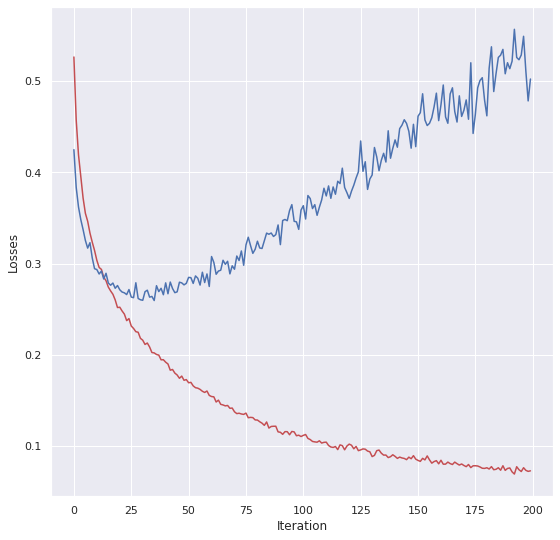

In [113]:
fig = plt.figure(figsize = (9,9))
sns.set_theme(color_codes = True)
plt.plot(history.history['loss'], label = 'loss',color = 'r')
plt.plot(history.history['val_loss'],label = 'val_loss',color = 'b')
plt.xlabel("Iteration")
plt.ylabel("Losses")
plt.show()

In [105]:
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [117]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture


In [118]:
loss, acc = new_model.evaluate(X_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

preds = new_model.predict(X_test)

313/313 - 1s - loss: 0.4778 - accuracy: 0.9039
Restored model, accuracy: 90.39%
